![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor


# import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv
/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv


In [2]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [4]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [6]:
df_train.head(5)

Restaurant_id       City                                      Cuisine Style  \
0       id_5569      Paris            ['European', 'French', 'International']   
1       id_1535  Stockholm                                                NaN   
2        id_352     London  ['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...   
3       id_3456     Berlin                                                NaN   
4        id_615     Munich  ['German', 'Central European', 'Vegetarian Fri...   

   Ranking  Rating Price Range  Number of Reviews  \
0   5570.0     3.5    $$ - $$$              194.0   
1   1537.0     4.0         NaN               10.0   
2    353.0     4.5        $$$$              688.0   
3   3458.0     5.0         NaN                3.0   
4    621.0     4.0    $$ - $$$               84.0   

                                             Reviews  \
0  [['Good food at your doorstep', 'A good hotel ...   
1  [['Unique cuisine', 'Delicious Nepalese food']...   
2  [['Catch up with friends', 'Not exceptional'],...   
3                                           [[], []]   
4  [['Best place to try a Bavarian food', 'Nice b...   

                                              URL_TA     ID_TA  
0  /Restaurant_Review-g187147-d1912643-Reviews-R_...  d1912643  
1  /Restaurant_Review-g189852-d7992032-Reviews-Bu...  d7992032  
2  /Restaurant_Review-g186338-d8632781-Reviews-RO...  d8632781  
3  /Restaurant_Review-g187323-d1358776-Reviews-Es...  d1358776  
4  /Restaurant_Review-g187309-d6864963-Reviews-Au...  d6864963

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [8]:
df_test.head(5)

Restaurant_id        City  \
0          id_0       Paris   
1          id_1    Helsinki   
2          id_2   Edinburgh   
3          id_3      London   
4          id_4  Bratislava   

                                       Cuisine Style  Ranking Price Range  \
0                                     ['Bar', 'Pub']  12963.0    $$ - $$$   
1  ['European', 'Scandinavian', 'Gluten Free Opti...    106.0    $$ - $$$   
2                            ['Vegetarian Friendly']    810.0    $$ - $$$   
3  ['Italian', 'Mediterranean', 'European', 'Vege...   1669.0        $$$$   
4  ['Italian', 'Mediterranean', 'European', 'Seaf...     37.0        $$$$   

   Number of Reviews                                            Reviews  \
0                4.0                                           [[], []]   
1               97.0  [['Very good reviews!', 'Fine dining in Hakani...   
2               28.0  [['Better than the Links', 'Ivy Black'], ['12/...   
3              202.0  [['Most exquisite', 'Delicious and authentic']...   
4              162.0  [['Always the best in bratislava', 'Very good ...   

                                              URL_TA      ID_TA  
0  /Restaurant_Review-g187147-d10746918-Reviews-L...  d10746918  
1  /Restaurant_Review-g189934-d6674944-Reviews-Ra...   d6674944  
2  /Restaurant_Review-g186525-d13129638-Reviews-B...  d13129638  
3  /Restaurant_Review-g186338-d680417-Reviews-Qui...    d680417  
4  /Restaurant_Review-g274924-d1112354-Reviews-Ma...   d1112354

In [9]:
sample_submission.head(5)

Restaurant_id  Rating
0          id_0     2.0
1          id_1     2.5
2          id_2     4.0
3          id_3     1.0
4          id_4     4.0

In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [11]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [13]:
data.sample(5)

Restaurant_id       City  \
42537       id_2306  Amsterdam   
9973        id_9973     Madrid   
12157        id_356  Ljubljana   
19453       id_5054  Barcelona   
40770        id_328       Oslo   

                                           Cuisine Style  Ranking Price Range  \
42537                            ['Asian', 'Indonesian']   2312.0         NaN   
9973                                                 NaN   7277.0         NaN   
12157                                        ['Seafood']    357.0         NaN   
19453                 ['International', 'Mediterranean']   5055.0    $$ - $$$   
40770  ['Italian', 'Mediterranean', 'European', 'Pizz...    329.0    $$ - $$$   

       Number of Reviews                                            Reviews  \
42537                2.0                                           [[], []]   
9973                 NaN                                           [[], []]   
12157                9.0  [['Fish market and restaurant in BTC shopping....   
19453               12.0  [['food review', 'Convenient & Relaxing Snacks...   
40770               66.0  [['Friendly and casual italian restaurant', 'G...   

                                                  URL_TA      ID_TA  sample  \
42537  /Restaurant_Review-g188590-d7078154-Reviews-Ma...   d7078154       1   
9973   /Restaurant_Review-g187514-d12503121-Reviews-B...  d12503121       0   
12157  /Restaurant_Review-g274873-d3793122-Reviews-Ko...   d3793122       1   
19453  /Restaurant_Review-g187497-d1084022-Reviews-Sy...   d1084022       1   
40770  /Restaurant_Review-g190479-d8077527-Reviews-QU...   d8077527       1   

       Rating  
42537     4.5  
9973      0.0  
12157     4.0  
19453     4.5  
40770     4.0

In [14]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

In [15]:
# Для примера я возьму столбец Number of Reviews
data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')

In [16]:
data['Number_of_Reviews_isNAN']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: Number_of_Reviews_isNAN, Length: 50000, dtype: uint8

In [17]:
# Далее заполняем пропуски 0, вы можете попробовать заполнением средним или средним по городу и тд...
data['Number of Reviews'].fillna(0, inplace=True)

### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [18]:
data.nunique(dropna=False)

Restaurant_id              13094
City                          31
Cuisine Style              10732
Ranking                    12975
Price Range                    4
Number of Reviews           1574
Reviews                    41858
URL_TA                     49963
ID_TA                      49963
sample                         2
Rating                        10
Number_of_Reviews_isNAN        2
dtype: int64

In [19]:
# для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
data = pd.get_dummies(data, columns=[ 'City',], dummy_na=True)

In [20]:
data.head(5)

Restaurant_id                                      Cuisine Style  Ranking  \
0          id_0                                     ['Bar', 'Pub']  12963.0   
1          id_1  ['European', 'Scandinavian', 'Gluten Free Opti...    106.0   
2          id_2                            ['Vegetarian Friendly']    810.0   
3          id_3  ['Italian', 'Mediterranean', 'European', 'Vege...   1669.0   
4          id_4  ['Italian', 'Mediterranean', 'European', 'Seaf...     37.0   

  Price Range  Number of Reviews  \
0    $$ - $$$                4.0   
1    $$ - $$$               97.0   
2    $$ - $$$               28.0   
3        $$$$              202.0   
4        $$$$              162.0   

                                             Reviews  \
0                                           [[], []]   
1  [['Very good reviews!', 'Fine dining in Hakani...   
2  [['Better than the Links', 'Ivy Black'], ['12/...   
3  [['Most exquisite', 'Delicious and authentic']...   
4  [['Always the best in bratislava', 'Very good ...   

                                              URL_TA      ID_TA  sample  \
0  /Restaurant_Review-g187147-d10746918-Reviews-L...  d10746918       0   
1  /Restaurant_Review-g189934-d6674944-Reviews-Ra...   d6674944       0   
2  /Restaurant_Review-g186525-d13129638-Reviews-B...  d13129638       0   
3  /Restaurant_Review-g186338-d680417-Reviews-Qui...    d680417       0   
4  /Restaurant_Review-g274924-d1112354-Reviews-Ma...   d1112354       0   

   Rating  ...  City_Oporto  City_Oslo  City_Paris  City_Prague  City_Rome  \
0     0.0  ...            0          0           1            0          0   
1     0.0  ...            0          0           0            0          0   
2     0.0  ...            0          0           0            0          0   
3     0.0  ...            0          0           0            0          0   
4     0.0  ...            0          0           0            0          0   

   City_Stockholm  City_Vienna  City_Warsaw  City_Zurich  City_nan  
0               0            0            0            0         0  
1               0            0            0            0         0  
2               0            0            0            0         0  
3               0            0            0            0         0  
4               0            0            0            0         0  

[5 rows x 43 columns]

In [21]:
data.sample(5)

Restaurant_id                                      Cuisine Style  \
15322       id_3199                                                NaN   
38026       id_6796                                        ['Spanish']   
25952         id_99  ['Swiss', 'Bar', 'European', 'Vegetarian Frien...   
16177       id_1828                                                NaN   
1238        id_1238  ['European', 'Gluten Free Options', 'Vegetaria...   

       Ranking Price Range  Number of Reviews  \
15322   3201.0         NaN                7.0   
38026   6799.0         NaN                6.0   
25952    100.0    $$ - $$$              242.0   
16177   1831.0         NaN               17.0   
1238     641.0    $$ - $$$              178.0   

                                                 Reviews  \
15322                                           [[], []]   
38026  [['beautiful Madrid ...sorry !', 'Pleasant tap...   
25952  [['Nice in summer', 'Summer time spacial place...   
16177  [['A must try!', 'A must in Lisbon'], ['01/10/...   
1238   [['Impeccable food but disappointing service',...   

                                                  URL_TA     ID_TA  sample  \
15322  /Restaurant_Review-g187849-d8338352-Reviews-Ba...  d8338352       1   
38026  /Restaurant_Review-g187514-d2223840-Reviews-Ve...  d2223840       1   
25952  /Restaurant_Review-g188113-d3607254-Reviews-Fr...  d3607254       1   
16177  /Restaurant_Review-g189158-d2615880-Reviews-O_...  d2615880       1   
1238   /Restaurant_Review-g186338-d7894147-Reviews-Na...  d7894147       0   

       Rating  ...  City_Oporto  City_Oslo  City_Paris  City_Prague  \
15322     4.5  ...            0          0           0            0   
38026     3.5  ...            0          0           0            0   
25952     4.0  ...            0          0           0            0   
16177     4.5  ...            0          0           0            0   
1238      0.0  ...            0          0           0            0   

       City_Rome  City_Stockholm  City_Vienna  City_Warsaw  City_Zurich  \
15322          0               0            0            0            0   
38026          0               0            0            0            0   
25952          0               0            0            0            1   
16177          0               0            0            0            0   
1238           0               0            0            0            0   

       City_nan  
15322         0  
38026         0  
25952         0  
16177         0  
1238          0  

[5 rows x 43 columns]

#### Возьмем следующий признак "Price Range".

In [22]:
data['Price Range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

По описанию 'Price Range' это - Цены в ресторане.  
Их можно поставить по возрастанию (значит это не категориальный признак). А это значит, что их можно заменить последовательными числами, например 1,2,3  
*Попробуйте сделать обработку этого признака уже самостоятельно!*

### Посмотрим распределение признака

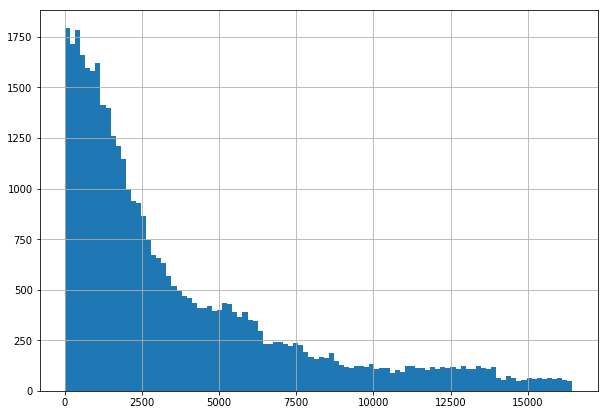

In [23]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

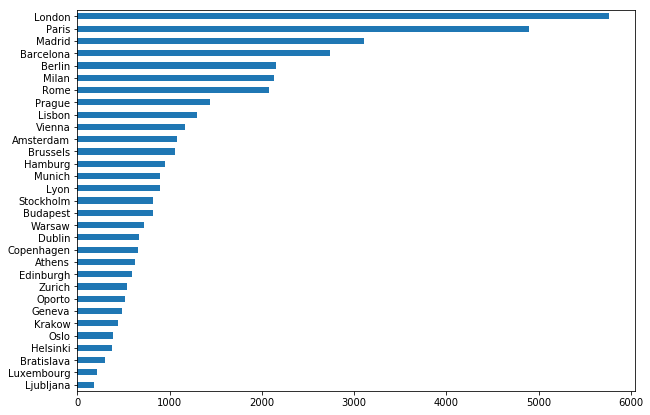

In [24]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

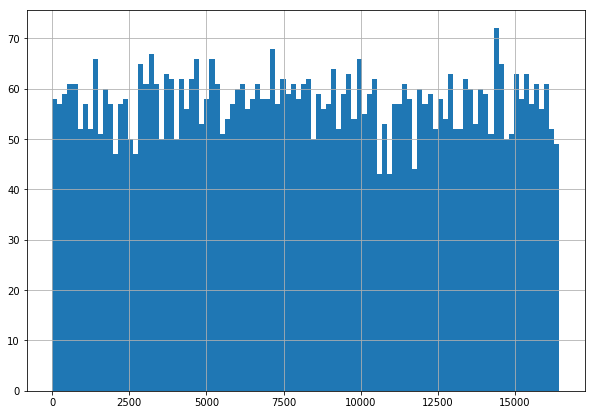

In [25]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

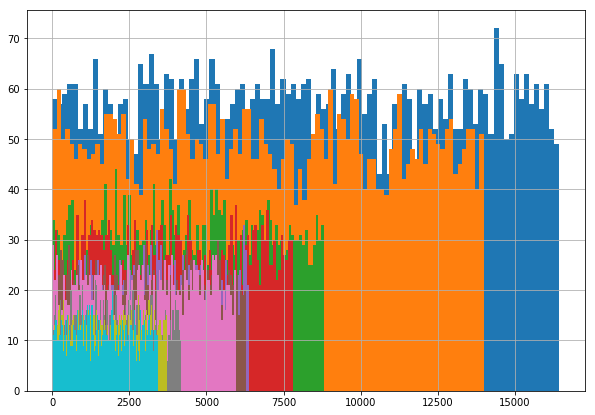

In [26]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.


### Посмотрим распределение целевой переменной

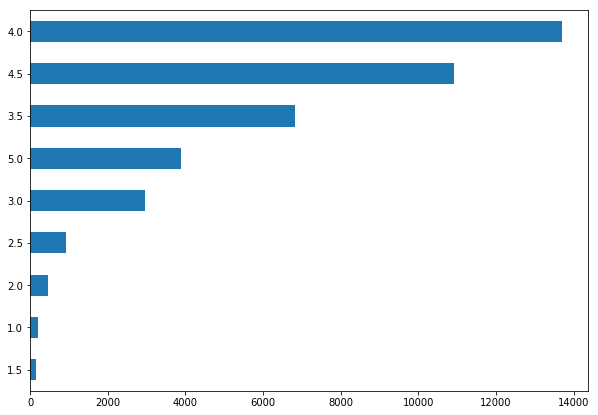

In [27]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

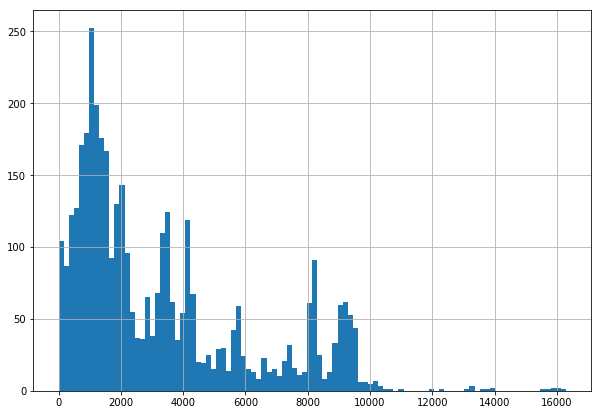

In [28]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

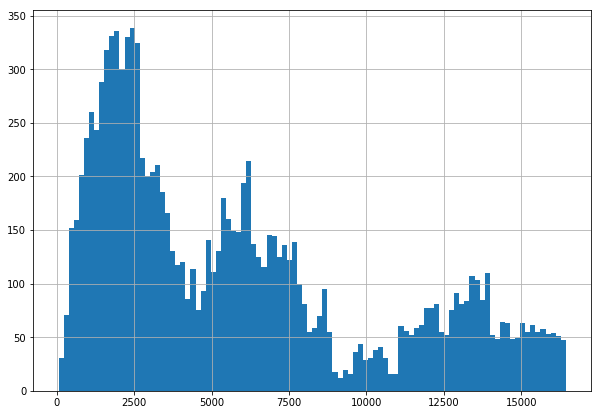

In [29]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

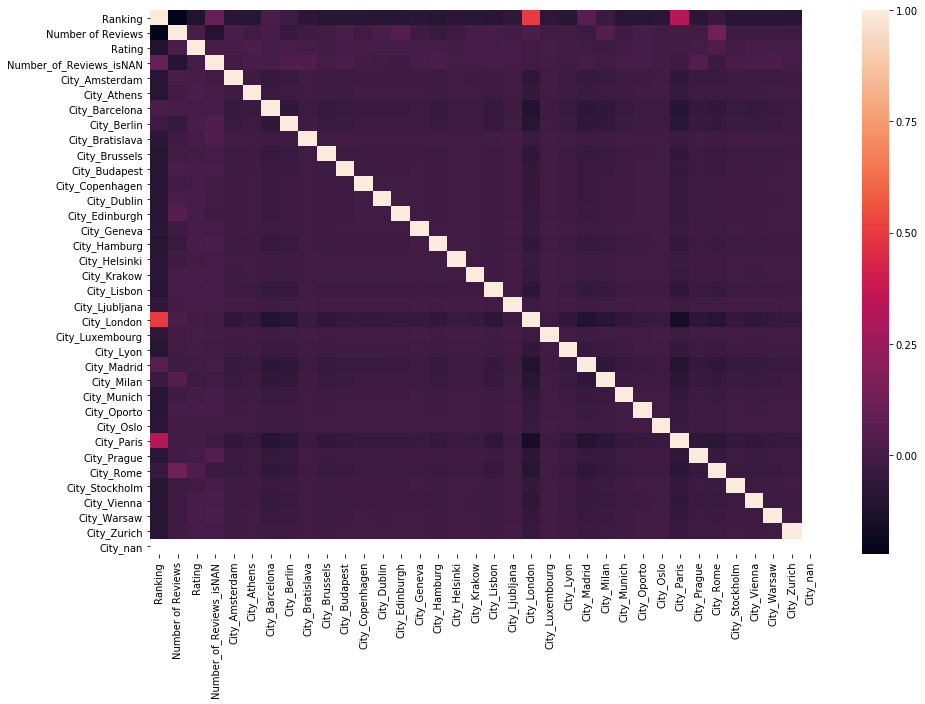

In [30]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [31]:
# на всякий случай, заново подгружаем данные
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'/kaggle_task.csv')
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [32]:
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    
    # ################### 1. Предобработка ############################################################## 
    # переведём в нижний регистр названия столбцов
    df_output.columns = df_output.columns.str.lower()
    # заменим пробелы в названиях столбцов на символ нижний подчерк
    df_output.columns = df_output.columns.str.replace(' ', '_')
    
    
    # ################### 2. NAN ############################################################## 
    # создадим отделые колонки для строк с NAN
    df_output['number_of_reviews_is_nan'] = pd.isna(df_output['number_of_reviews']).astype('uint8')
    df_output['number_of_reviews'].fillna(0, inplace=True)
    
    df_output['cuisine_style_is_nan'] = pd.isna(df_output['cuisine_style']).astype('uint8')

    df_output['price_range_is_nan'] = df_output['price_range'].isna().astype('uint8')
   
    
    
    # ################### 3. Encoding ############################################################## 
    
    def clean_name(str_val):
        """
        Преобразует строку с названиями кухонь в список [list] названий кухонь.
        На входе:
            - строковая переменная, содержащая названия кухонь.
        На выходе:
            - список [list] названий кухонь.
        """
        if pd.isna(str_val): return ["Unknown"]
        str_val = str_val.strip('[]') # Отбрасываем скобки.
        str_val = str_val.replace("\'",'') # Убираем надоедливые кавычки '.
        str_val = str_val.split(", ") # Разбиваем строку по названиям кухонь.
        return str_val
    
    # Переведём данные из колонки cuisine_style к списку, пропуски заполним "Unknown"
    df_output["cuisine_style_list"] = df_output["cuisine_style"].apply(clean_name)
    

    # dummy variable prise-range исходя из распределения "$", "$$ - $$$", "$$$"
    price_range = {'$': 0, '$$ - $$$': 1, '$$$$': 2}
    df_output['price_range'] = df_output['price_range'].map(price_range)
    df_output['price_range'].fillna(df_output['price_range'].mean(), inplace=True) 
    
    # ################### 4. Feature Engineering ####################################################
    # количество кухонь в ресторане
    df_output['cuisine_style_count'] = df_output['cuisine_style_list'].apply(lambda x: 1 if len(x) == 0 else len(x))
    
    def reviews_date(str_rev):
        ''' Извлечение дат из колонки reviеws'''
        reviews_date = []
        for i in str_rev:
            if i == '[[], []]' or i == 0:
                reviews_date.append('')
            else:
                i = str(i).replace(']]', '')
                i = i.replace('"', "'")  # строка 177
                i = i.replace('nan', "'nan'")  # строка 5315
                i = i.replace("'", '')
                i = i.split('], [')[1]
                i = i.split(', ')
                reviews_date.append(i)
        return reviews_date
    
    df_output['reviews'].fillna(0, inplace=True)
    df_output['reviews_date'] = reviews_date(df_output.reviews)          
    df_output['reviews_date_1'] = df_output['reviews_date'].apply(lambda x: x[1] if len(x) == 2 else None)
    df_output['reviews_date_2'] = df_output['reviews_date'].apply(lambda x: x[0] if len(x) > 0 else None)
    
    # reviews_date_1 - дата первого отзыва
    # reviews_date_2 - дата второго отзыва
    df_output['reviews_date_1'] = pd.to_datetime(df_output['reviews_date_1'])
    df_output['reviews_date_2'] = pd.to_datetime(df_output['reviews_date_2'])

    # review_days_range - промежуток между отзывами в днях
    df_output['review_days_range'] = (df_output['reviews_date_2'] - df_output['reviews_date_2']).dt.days
    
    # days_untill_today - промежуток с последнего отзыва в днях
    df_output['days_untill_today'] = (datetime.now() - df_output['reviews_date_2']).dt.days
    
    # rest_city - количество ресторанов в городе
    df_output['rest_city'] = df_output['city'].map(df_output.groupby(['city'])['restaurant_id'].count().to_dict())
    
    # relative_rank - отношение ранга ресторана к количеству ресторанов в городе
    df_output['relative_rank'] = df_output['ranking'] / df_output['rest_city']
    
    # rew_city - количество отзывов в городе
    df_output['rew_city'] = df_output['city'].map(df_output.groupby(['city'])['number_of_reviews'].count().to_dict())
    
    # relative_rank_reviews - отношение ранга ресторана к количеству отзывов в городе
    df_output['relative_rank_reviews'] = df_output['ranking'] / df_output['rew_city']
    
    # какой-то ID(O_o???)
    df_output['id_ta'] = df_output['id_ta'].apply(lambda x: float(x[1:]))
 
    population = {'London': 8.982,'Paris': 2.148, 'Madrid': 6.642, 'Berlin': 3.769,  'Rome':2.873 , 'Prague': 1.309,
              'Lisbon': 0.504, 'Vienna': 1.897, 'Amsterdam': 0.821, 'Brussels': 0.174, 'Stockholm': 0.975, 
              'Budapest': 1.752, 'Warsaw': 1.708, 'Dublin': 1.388, 'Copenhagen': 0.602, 'Athens': 0.664, 
              'Edinburgh': 0.482, 'Oslo': 0.681, 'Helsinki': 0.631, 'Bratislava': 0.424, 'Luxembourg': 0.116, 
              'Ljubljana': 0.279, 'Munich': 1.472, 'Oporto': 0.214, 'Milan': 1.352, 'Barcelona': 5.575,
              'Zurich': 0.402, 'Lyon': 0.513, 'Hamburg': 1.899, 'Geneva': 0.499, 'Krakow': 0.769}
    df_output['population'] = df_output['city'].map(population)
    
    # rests_to_pop - отношение числа ресторанов в городе к численности населения
    df_output['rests_to_pop'] = df_output['rest_city'] / df_output['population']
    
    # ranked_cities - ранг городов
    df_output['ranked_cities'] = df_output['city'].rank()
 
    
    # dummy variable city_'name of city'
    df_output = pd.get_dummies(df_output, columns=['city',], dummy_na=True)
    
    
    
    # ################### 5. Clean #################################################### 
    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object' or df_output[s].dtypes == 'datetime64[ns]' ]
    df_output.drop(object_columns, axis = 1, inplace=True)
    df_output = df_output.fillna(df_output.mean()) 
    
    return df_output

>По хорошему, можно было бы перевести эту большую функцию в класс и разбить на подфункции (согласно ООП). 

#### Запускаем и проверяем что получилось

In [33]:
df_preproc = preproc_data(data)
df_preproc.sample(10)

ranking  price_range  number_of_reviews       id_ta  sample  rating  \
7041    3280.0     1.000000               85.0   8058337.0       0     0.0   
861     2838.0     0.815129              117.0   2439609.0       0     0.0   
24045   3787.0     0.815129                8.0  10623137.0       1     4.5   
20315   3218.0     1.000000               19.0   6420536.0       1     3.5   
12130   6064.0     1.000000               29.0   2487031.0       1     3.5   
40855    202.0     0.815129                8.0  10498980.0       1     4.5   
26675  10822.0     0.815129                8.0   5810016.0       1     4.5   
49280    157.0     1.000000              149.0   2174272.0       1     4.5   
46821    365.0     1.000000              214.0    697302.0       1     4.5   
33888   3310.0     0.815129               31.0  10455097.0       1     4.5   

       number_of_reviews_is_nan  cuisine_style_is_nan  price_range_is_nan  \
7041                          0                     0                   0   
861                           0                     0                   1   
24045                         0                     1                   1   
20315                         0                     0                   0   
12130                         0                     0                   0   
40855                         0                     0                   1   
26675                         0                     1                   1   
49280                         0                     0                   0   
46821                         0                     0                   0   
33888                         0                     1                   1   

       cuisine_style_count  ...  city_Oporto  city_Oslo  city_Paris  \
7041                     5  ...            0          0           0   
861                      1  ...            0          0           0   
24045                    1  ...            0          0           0   
20315                    1  ...            0          0           0   
12130                    3  ...            0          0           0   
40855                    2  ...            0          0           0   
26675                    1  ...            0          0           0   
49280                    4  ...            0          0           0   
46821                    3  ...            0          0           0   
33888                    1  ...            0          0           1   

       city_Prague  city_Rome  city_Stockholm  city_Vienna  city_Warsaw  \
7041             0          0               0            0            0   
861              0          1               0            0            0   
24045            0          0               0            0            0   
20315            0          0               0            0            0   
12130            0          0               0            0            0   
40855            0          0               0            0            0   
26675            0          0               0            0            0   
49280            0          0               0            0            0   
46821            0          0               0            0            0   
33888            0          0               0            0            0   

       city_Zurich  city_nan  
7041             0         0  
861              0         0  
24045            0         0  
20315            0         0  
12130            0         0  
40855            0         0  
26675            0         0  
49280            0         0  
46821            0         0  
33888            0         0  

[10 rows x 51 columns]

In [34]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 51 columns):
ranking                     50000 non-null float64
price_range                 50000 non-null float64
number_of_reviews           50000 non-null float64
id_ta                       50000 non-null float64
sample                      50000 non-null int64
rating                      50000 non-null float64
number_of_reviews_is_nan    50000 non-null uint8
cuisine_style_is_nan        50000 non-null uint8
price_range_is_nan          50000 non-null uint8
cuisine_style_count         50000 non-null int64
review_days_range           50000 non-null float64
days_untill_today           50000 non-null float64
rest_city                   50000 non-null int64
relative_rank               50000 non-null float64
rew_city                    50000 non-null int64
relative_rank_reviews       50000 non-null float64
population                  50000 non-null float64
rests_to_pop                50000 non-

In [35]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.rating.values            # наш таргет
X = train_data.drop(['rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [36]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [37]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 50), (40000, 50), (40000, 49), (32000, 49), (8000, 49))

# Model 
Сам ML

In [38]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [39]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [40]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   11.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [41]:
#  Т.к рейтинг представлен с шагом в 0.5, то мы тоже округлим наши предсказания.
# Напишем для этого функцию.
def round_rating_pred(rating_pred):
    if rating_pred <= 0.5:
        return 0.0
    if rating_pred <= 1.5:
        return 1.0
    if rating_pred <= 1.75:
        return 1.5
    if rating_pred <= 2.25:
        return 2.0
    if rating_pred <= 2.75:
        return 2.5
    if rating_pred <= 3.25:
        return 3.0
    if rating_pred <= 3.75:
        return 3.5
    if rating_pred <= 4.25:
        return 4.0
    if rating_pred <= 4.75:
        return 4.5
    return 5.0

In [42]:
# Теперь округлим полученные значения.
for i in range(len(y_pred)):
    y_pred[i] = round_rating_pred(y_pred[i])

In [43]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.1659375


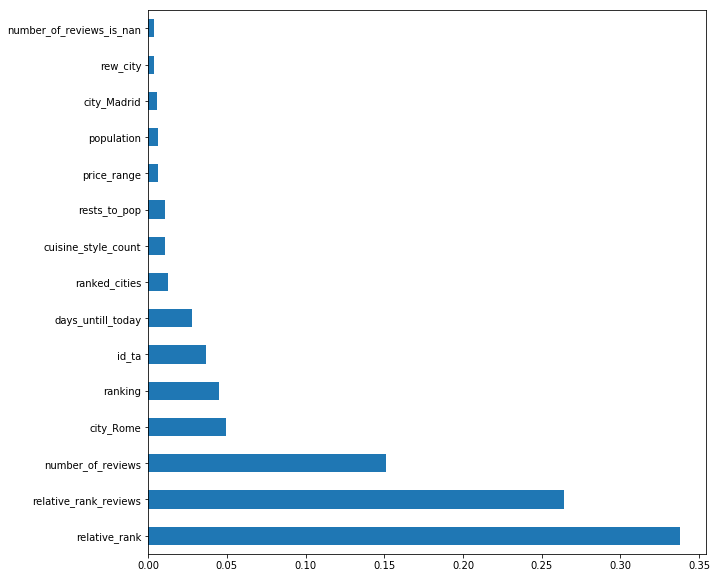

In [44]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [45]:
test_data.sample(10)

ranking  price_range  number_of_reviews       id_ta  rating  \
9662  15756.0          1.0               25.0  12895657.0     0.0   
2829   4911.0          0.0               40.0  11916045.0     0.0   
9775    783.0          1.0              433.0   6353469.0     0.0   
3349   1522.0          1.0               85.0   8712506.0     0.0   
2796   2612.0          0.0               16.0   6483082.0     0.0   
3126    396.0          1.0              146.0   1959313.0     0.0   
4952     40.0          1.0             4977.0   4041036.0     0.0   
9245   1094.0          1.0                0.0  12953011.0     0.0   
4270   2922.0          0.0               47.0   7294113.0     0.0   
1504   5889.0          1.0               18.0   7243214.0     0.0   

      number_of_reviews_is_nan  cuisine_style_is_nan  price_range_is_nan  \
9662                         0                     0                   0   
2829                         0                     0                   0   
9775                         0                     0                   0   
3349                         0                     0                   0   
2796                         0                     0                   0   
3126                         0                     0                   0   
4952                         0                     0                   0   
9245                         1                     0                   0   
4270                         0                     0                   0   
1504                         0                     0                   0   

      cuisine_style_count  review_days_range  ...  city_Oporto  city_Oslo  \
9662                    2                0.0  ...            0          0   
2829                    3                0.0  ...            0          0   
9775                    3                0.0  ...            0          0   
3349                    5                0.0  ...            0          0   
2796                    2                0.0  ...            0          0   
3126                    4                0.0  ...            0          0   
4952                    5                0.0  ...            0          0   
9245                    5                0.0  ...            0          0   
4270                    5                0.0  ...            0          0   
1504                    3                0.0  ...            0          0   

      city_Paris  city_Prague  city_Rome  city_Stockholm  city_Vienna  \
9662           0            0          0               0            0   
2829           0            0          0               0            0   
9775           0            0          0               0            0   
3349           0            0          0               0            0   
2796           0            0          0               0            0   
3126           0            0          0               0            0   
4952           0            0          0               0            0   
9245           0            0          0               1            0   
4270           0            0          1               0            0   
1504           0            0          0               0            0   

      city_Warsaw  city_Zurich  city_nan  
9662            0            0         0  
2829            0            0         0  
9775            0            0         0  
3349            0            0         0  
2796            0            0         0  
3126            0            0         0  
4952            0            0         0  
9245            0            0         0  
4270            0            0         0  
1504            0            0         0  

[10 rows x 50 columns]

In [46]:
test_data = test_data.drop(['rating'], axis=1)

In [47]:
sample_submission

Restaurant_id  Rating
0             id_0     2.0
1             id_1     2.5
2             id_2     4.0
3             id_3     1.0
4             id_4     4.0
...            ...     ...
9995       id_9995     3.0
9996       id_9996     1.5
9997       id_9997     4.5
9998       id_9998     1.0
9999       id_9999     2.5

[10000 rows x 2 columns]

In [48]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [49]:
predict_submission

array([3.195, 4.21 , 4.17 , ..., 3.015, 4.495, 4.24 ])

In [50]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

Restaurant_id  Rating
0          id_0   3.195
1          id_1   4.210
2          id_2   4.170
3          id_3   4.355
4          id_4   4.450
5          id_5   4.545
6          id_6   2.275
7          id_7   2.355
8          id_8   4.065
9          id_9   4.540

# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
